In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import statistics as stats

In [2]:
# Life expectancy (http://apps.who.int/gho/data/node.main.688?lang=en) - chosen 2015
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/WHOSIS_000001,WHOSIS_000015&profile=crosstable&filter=COUNTRY:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX"
life = pd.read_csv(url) 
life = life.ix[1:,0:3]
life.columns = ['Country', 'Year', 'LifeExpectancy']
life['Year'] = life['Year'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 
life['LifeExpectancy'] = life['LifeExpectancy'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 
life = life.loc[life['Year'] == 2015]
del life['Year']

In [3]:
life.head(5)

,Country,LifeExpectancy
1,Afghanistan,60.5
17,Albania,77.8
33,Algeria,75.6
50,Angola,52.4
66,Antigua and Barbuda,76.4


In [4]:
life.dtypes

Country            object
LifeExpectancy    float64
dtype: object

In [5]:
# Smoking status (http://apps.who.int/gho/data/node.main.1250?lang=en) - 2013, only value
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/M_Est_tob_curr,M_Est_tob_daily,M_Est_cig_curr,M_Est_cig_daily&profile=crosstable&filter=COUNTRY:*;SEX:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX"
smoking = pd.read_csv(url)
smoking = smoking.ix[1:,0:3]
del smoking['Unnamed: 1']
smoking.columns = ['Country', 'Smoking']
smoking['Smoking'] = smoking['Smoking'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 

In [6]:
smoking.head(5)

,Country,Smoking
1,Afghanistan,NaN
2,Albania,29.7
3,Algeria,NaN
4,Andorra,33.1
5,Angola,NaN


In [7]:
# Alcohol (http://apps.who.int/gho/data/node.main.A1026?lang=en) - 2010 was used
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/SA_0000001400&profile=crosstable&filter=COUNTRY:*;YEAR:2015;YEAR:2x014;YEAR:2013;YEAR:2012;YEAR:2011;YEAR:2010;YEAR:2009;YEAR:2008;YEAR:2007;YEAR:2006;YEAR:2005;YEAR:2004;YEAR:2003;YEAR:2002;YEAR:2001;YEAR:2000&x-sideaxis=COUNTRY;DATASOURCE;ALCOHOLTYPE&x-topaxis=GHO;YEAR"
alcohol = pd.read_csv(url)
del alcohol['Unnamed: 1']
alcohol = alcohol.ix[1:]
alcohol.columns = ['Country', 'AlcType', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
                  '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000']
alcohol.head(5)
alcohol.isnull().sum() # Finding most complete recent year - 2010 looks like it

Country      0
AlcType      0
2015       964
2014       504
2013       339
2012       342
2011        54
2010        16
2009        14
2008        14
2007        14
2006         9
2005         8
2004        14
2003        14
2002        19
2001        19
2000        18
dtype: int64

In [8]:
alcohol.ix[:, 7:] = alcohol.ix[:, 7:].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 
alcohol = pd.melt(alcohol, id_vars=['Country', 'AlcType'], 
                  value_vars=['2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
                              '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000'])

In [9]:
alcohol.columns = ['Country', 'AlcType', 'Year', 'AlcConsumption']
alcohol['Year'] = alcohol['Year'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 
alcohol = alcohol.loc[alcohol['Year'] == 2010]
alcohol = alcohol[alcohol['AlcType'].str.contains("All types")]
del alcohol['AlcType']
del alcohol['Year']
alcohol.head(5)

,Country,AlcConsumption
4920,Afghanistan,0.01
4925,Albania,5.28
4930,Algeria,0.45
4935,Andorra,10.60
4940,Angola,7.80


In [10]:
# Overweight (http://apps.who.int/gho/data/node.main.A897A?lang=en) - 2014 used
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/NCD_BMI_25A&profile=crosstable&filter=AGEGROUP:*;COUNTRY:*;SEX:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR;AGEGROUP;SEX"
oweight = pd.read_csv(url)
oweight = oweight.ix[3:,0:2]
oweight.columns = ['Country', 'Overweight']

oweight['Overweight'] = oweight['Overweight'].apply(lambda x: x.split(' [')[0])
oweight['Overweight'] = oweight['Overweight'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 

In [11]:
oweight.head(5)

,Country,Overweight
3,Afghanistan,16.2
4,Albania,52.7
5,Algeria,59.1
6,Andorra,66.9
7,Angola,30.9


In [12]:
# Physical activity (http://apps.who.int/gho/data/node.main.A893?lang=en) - 
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/NCD_PAC,NCD_PAA&profile=crosstable&filter=AGEGROUP:YEARS18-PLUS;COUNTRY:*;SEX:*;&x-sideaxis=COUNTRY;YEAR;AGEGROUP&x-topaxis=GHO;SEX"
exercise = pd.read_csv(url)
del exercise['Unnamed: 2']
exercise = exercise.ix[1:, :3]
exercise.columns = ['Country', 'Year', 'LowExercise']
del exercise['Year']

exercise['LowExercise'] = exercise['LowExercise'].apply(lambda x: x.split(' [')[0])
exercise['LowExercise'] = exercise['LowExercise'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 

In [13]:
exercise.head(5)

,Country,LowExercise
1,Afghanistan,NaN
2,Albania,NaN
3,Algeria,34.4
4,Andorra,26.1
5,Angola,NaN


In [14]:
# Cholesterol (http://apps.who.int/gho/data/node.main.A884?lang=en) - 2008
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/CHOL_01,CHOL_02&profile=crosstable&filter=AGEGROUP:*;COUNTRY:*;SEX:*&x-sideaxis=COUNTRY;YEAR;AGEGROUP&x-topaxis=GHO;SEX"
chol = pd.read_csv(url)
del chol['Unnamed: 2']
chol = chol.ix[1:, :3]
chol.columns = ['Country', 'Year', 'Cholesterol']
del chol['Year']

chol['Cholesterol'] = chol['Cholesterol'].apply(lambda x: x.split(' [')[0])
chol['Cholesterol'] = chol['Cholesterol'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 

In [15]:
chol.head(5)

,Country,Cholesterol
1,Afghanistan,21.9
2,Albania,45.3
3,Algeria,39.4
4,Andorra,67.1
5,Angola,30.9


In [16]:
# Blood sugar (http://apps.who.int/gho/data/node.main.A869?lang=en) - 2014
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/NCD_GLUC_03,NCD_GLUC_04&profile=crosstable&filter=AGEGROUP:*;COUNTRY:*;SEX:*&x-sideaxis=COUNTRY;YEAR;AGEGROUP&x-topaxis=GHO;SEX"
bsugar = pd.read_csv(url)
del bsugar['Unnamed: 2']
bsugar = bsugar.ix[1:, :3]
bsugar.columns = ['Country', 'Year', 'BloodSugar']

bsugar['BloodSugar'] = bsugar['BloodSugar'].apply(lambda x: x.split(' [')[0])
bsugar['BloodSugar'] = bsugar['BloodSugar'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 
bsugar = bsugar.loc[bsugar['Year'].str.contains("2014")]
del bsugar['Year']

In [17]:
bsugar.head(5)

,Country,BloodSugar
1,Afghanistan,8.4
3,Albania,8.3
5,Algeria,10.5
7,Andorra,9.1
9,Angola,5.6


In [18]:
# Unsafe water, sanitation and hygiene (http://apps.who.int/gho/data/node.main.167?lang=en) - used 2015
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/WHS5_122,WHS5_158&profile=crosstable&filter=COUNTRY:*;RESIDENCEAREATYPE:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;RESIDENCEAREATYPE"
sanitation = pd.read_csv(url)
sanitation = sanitation[['Unnamed: 0', 'Unnamed: 1',
                        'Population using improved drinking-water sources (%).2',
                        'Population using improved sanitation facilities (%).2']]
sanitation = sanitation.ix[1:,]
sanitation.columns = ['Country', 'Year', 'ImprovedWater', 'ImprovedSanitation']
sanitation['Year'] = sanitation['Year'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 
sanitation['ImprovedWater'] = sanitation['ImprovedWater'].apply(lambda x: pd.to_numeric(x, errors ='coerce'))
sanitation['ImprovedSanitation'] = sanitation['ImprovedSanitation'].apply(lambda x: pd.to_numeric(x, errors ='coerce'))
sanitation = sanitation.loc[sanitation['Year'] == 2015]
del sanitation['Year']

In [19]:
sanitation.head(5)

,Country,ImprovedWater,ImprovedSanitation
1,Afghanistan,55.3,31.9
3,Albania,95.1,93.2
6,Algeria,83.6,87.6
9,Andorra,100.0,100.0
12,Angola,49.0,51.6


In [20]:
# Maternal deaths (http://apps.who.int/gho/data/node.main.MATMORT?lang=en) - used 2015
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/MDG_0000000026,MORT_MATERNALNUM&profile=crosstable&filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO"
maternal = pd.read_csv(url)
maternal = maternal.ix[:, :3]
maternal.columns = ['Country', 'Year', 'MaternalDeaths']

maternal['MaternalDeaths'] = maternal['MaternalDeaths'].str.replace(' ', '')
maternal['MaternalDeaths'] = maternal['MaternalDeaths'].apply(lambda x: x.split('[')[0])
maternal['MaternalDeaths'] = maternal['MaternalDeaths'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 

maternal['Year'] = maternal['Year'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 
maternal = maternal.loc[maternal['Year'] == 2015]
del maternal['Year']

In [21]:
maternal.head(5)

,Country,MaternalDeaths
0,Afghanistan,396
3,Albania,29
6,Algeria,140
9,Angola,477
12,Argentina,52


In [22]:
# UV radiation exposure (http://apps.who.int/gho/data/node.main.164?lang=en)
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/UV_1&profile=crosstable&filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR"
uvrad = pd.read_csv(url)
uvrad = uvrad.ix[1:, ]
uvrad.columns = ['Country', 'UVRadiation']

In [23]:
uvrad.head(5)

,Country,UVRadiation
1,Afghanistan,4132
2,Albania,2542
3,Algeria,3253
4,Andorra,2469
5,Angola,5287


In [24]:
# Homicide (http://apps.who.int/gho/data/node.main.VIOLENCEHOMICIDE?lang=en)
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/VIOLENCE_HOMICIDENUM,VIOLENCE_HOMICIDERATE&profile=crosstable&filter=COUNTRY:*;AGEGROUP:-;SEX:-&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR"
homicides = pd.read_csv(url)
del homicides['Estimates of number of homicides']
homicides = homicides.ix[1:,]
homicides.columns = ['Country', 'HomicideRate']

homicides['HomicideRate'] = homicides['HomicideRate'].apply(lambda x: x.split('[')[0])
homicides['HomicideRate'] = homicides['HomicideRate'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 

In [25]:
homicides.head(5)

,Country,HomicideRate
1,Afghanistan,7.3
2,Albania,5.0
3,Algeria,4.4
4,Andorra,0.8
5,Angola,10.7


In [26]:
# Road traffic deaths (http://apps.who.int/gho/data/node.main.A997?lang=en)
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/RS_196,RS_198&profile=crosstable&filter=COUNTRY:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR"
traffdeath = pd.read_csv(url)
del traffdeath['Estimated number of road traffic deaths']
traffdeath = traffdeath.ix[1:,]
traffdeath.columns = ['Country', 'TrafficDeaths']

In [27]:
traffdeath.head(5)

,Country,TrafficDeaths
1,Afghanistan,15.5
2,Albania,15.1
3,Algeria,23.8
4,Andorra,7.6
5,Angola,26.9


In [28]:
# Malaria (http://apps.who.int/gho/data/view.main.14111?lang=en)
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/MALARIA002&profile=crosstable&filter=COUNTRY:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR"
malaria = pd.read_csv(url)
malaria = malaria.ix[1:, :2]
malaria.columns = ['Country', 'Malaria']

malaria['Malaria'] = malaria['Malaria'].str.replace(' ', '')
malaria['Malaria'] = malaria['Malaria'].str.replace('&lt;', '')
malaria['Malaria'] = malaria['Malaria'].apply(lambda x: x.split('[')[0])
malaria['Malaria'] = malaria['Malaria'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 

In [29]:
malaria.head(5)

,Country,Malaria
1,Afghanistan,250000.0
2,Algeria,50.0
3,Angola,3400000.0
4,Argentina,0.0
5,Armenia,NaN


In [30]:
# Number of people with HIV (http://apps.who.int/gho/data/node.main.620?lang=en)
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/HIV_0000000001&profile=crosstable&filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR"
hiv = pd.read_csv(url)
hiv = hiv.ix[1:, :2]
hiv.columns = ['Country', 'HIV']

hiv['HIV'] = hiv['HIV'].str.replace(' ', '')
hiv['HIV'] = hiv['HIV'].str.replace('&lt;', '')
hiv['HIV'] = hiv['HIV'].apply(lambda x: x.split('[')[0])
hiv['HIV'] = hiv['HIV'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 

In [31]:
hiv.head(5)

,Country,HIV
1,Afghanistan,6700.0
2,Albania,NaN
3,Algeria,11000.0
4,Andorra,NaN
5,Angola,300000.0


In [32]:
# Tuberculosis (http://apps.who.int/gho/data/view.main.57040ALL?lang=en)
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/MDG_0000000020,TB_e_inc_num,TB_e_inc_tbhiv_100k,TB_e_inc_tbhiv_num&profile=crosstable&filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO"
tb = pd.read_csv(url)
tb = tb[['Country', 'Year',
                        'Incidence of tuberculosis (per 100 000 population per year)']]
tb.columns = ['Country', 'Year', 'Tubercululosis']
tb = tb.loc[tb['Year'] == 2014]
del tb['Year']

tb['Tubercululosis'] = tb['Tubercululosis'].str.replace(' ', '')
tb['Tubercululosis'] = tb['Tubercululosis'].str.replace('&lt;', '')
tb['Tubercululosis'] = tb['Tubercululosis'].apply(lambda x: x.split('[')[0])
tb['Tubercululosis'] = tb['Tubercululosis'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 

In [33]:
tb.head(5)

,Country,Tubercululosis
0,Afghanistan,189.0
25,Albania,19.0
50,Algeria,78.0
75,Andorra,9.2
100,Angola,370.0


In [34]:
# Suicide (http://apps.who.int/gho/data/node.main.MHSUICIDE?lang=en)
url = "http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/MH_12&profile=crosstable&filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR;SEX"
suicide = pd.read_csv(url)
suicide = suicide.ix[2:, :2]
suicide.columns = ['Country', 'Suicide']
suicide['Suicide'] = suicide['Suicide'].apply(lambda x: pd.to_numeric(x, errors ='coerce')) 

In [35]:
suicide.head(5)

,Country,Suicide
2,Afghanistan,5.7
3,Albania,5.9
4,Algeria,1.9
5,Angola,13.8
6,Argentina,10.3


In [36]:
def mergeFunc(dataframe1, dataframe2):
    return pd.merge(dataframe1, dataframe2, left_on='Country', 
                    right_on='Country', how='outer')

In [68]:
totaldf = mergeFunc(life, alcohol)
for i in [oweight, chol, bsugar, sanitation, maternal,
         uvrad, homicides, traffdeath, tb, suicide]:
    totaldf = mergeFunc(totaldf, i)

In [69]:
totaldf.head(5)

,Country,LifeExpectancy,AlcConsumption,Overweight,Cholesterol,BloodSugar,ImprovedWater,ImprovedSanitation,MaternalDeaths,UVRadiation,HomicideRate,TrafficDeaths,Tubercululosis,Suicide
0,Afghanistan,60,0.01,16,22,8.4,55,32,4e+02,4.1e+03,7.3,16,1.9e+02,5.7
1,Albania,78,5.3,53,45,8.3,95,93,29,2.5e+03,5,15,19,5.9
2,Algeria,76,0.45,59,39,10,84,88,1.4e+02,3.3e+03,4.4,24,78,1.9
3,Angola,52,7.8,31,31,5.6,49,52,4.8e+02,5.3e+03,11,27,3.7e+02,14
4,Antigua and Barbuda,76,7.8,62,43,12,98,nan,nan,5.1e+03,4.4,6.7,7.6,nan


In [39]:
corr_df = totaldf.corr(method='pearson')
print("--------------- CORRELATIONS ---------------")
print(corr_df.head(corr_df.shape[1]))

--------------- CORRELATIONS ---------------
                    LifeExpectancy   Smoking  AlcConsumption  Overweight  \
LifeExpectancy            1.000000  0.249703        0.449908    0.642331   
Smoking                   0.249703  1.000000        0.228790    0.371351   
AlcConsumption            0.449908  0.228790        1.000000    0.337301   
Overweight                0.642331  0.371351        0.337301    1.000000   
LowExercise               0.329608 -0.055418        0.069692    0.463555   
Cholesterol               0.819122  0.343770        0.558656    0.689507   
BloodSugar                0.375444  0.426404       -0.020947    0.689836   
ImprovedWater             0.769728  0.307961        0.395846    0.593261   
ImprovedSanitation        0.849289  0.330889        0.445358    0.686397   
MaternalDeaths           -0.854801 -0.289982       -0.351171   -0.660800   
UVRadiation              -0.557237 -0.425587       -0.564594   -0.364322   
HomicideRate             -0.189353 -0.24451

In [40]:
corr_df.shape[1]

17

In [41]:
Series.mean(totaldf['Suicide'])
#stats.mean(totaldf['Suicide'])

9.7319767441860474

In [42]:
#print(df.loc[df['B'].isin(['one','three'])])

print(totaldf.loc[totaldf['Country'].isin(['Panama', 'Guatemala', 'Australia'])])

       Country  LifeExpectancy  Smoking  AlcConsumption  Overweight  \
7    Australia            82.8     16.0           10.52        64.0   
66   Guatemala            71.9      NaN            2.14        52.0   
123     Panama            77.8      7.4            6.94        62.2   

     LowExercise  Cholesterol  BloodSugar  ImprovedWater  ImprovedSanitation  \
7           23.8         55.2         7.3          100.0               100.0   
66          13.3         27.7         7.5           92.8                63.9   
123          NaN         42.8         9.0           94.7                75.0   

     MaternalDeaths  UVRadiation  HomicideRate  TrafficDeaths  Malaria  \
7               6.0       3206.0           1.1            5.4      NaN   
66             88.0       5141.0          39.9           19.0  10400.0   
123            94.0       4898.0          19.3           10.0    830.0   

         HIV  Tubercululosis  Suicide  
7        NaN             6.4     10.6  
66   49000.0     

In [43]:
totaldf.ix[totaldf['AlcConsumption'].idxmax()]
totaldf.ix[totaldf['ImprovedWater'].idxmin()]

Country               Papua New Guinea
LifeExpectancy                    62.9
Smoking                            NaN
AlcConsumption                    0.79
Overweight                        60.7
LowExercise                       14.7
Cholesterol                       38.2
BloodSugar                        11.8
ImprovedWater                       40
ImprovedSanitation                18.9
MaternalDeaths                     215
UVRadiation                       5377
HomicideRate                      10.8
TrafficDeaths                     16.8
Malaria                        1.3e+06
HIV                              37000
Tubercululosis                     417
Suicide                           12.4
Name: 124, dtype: object

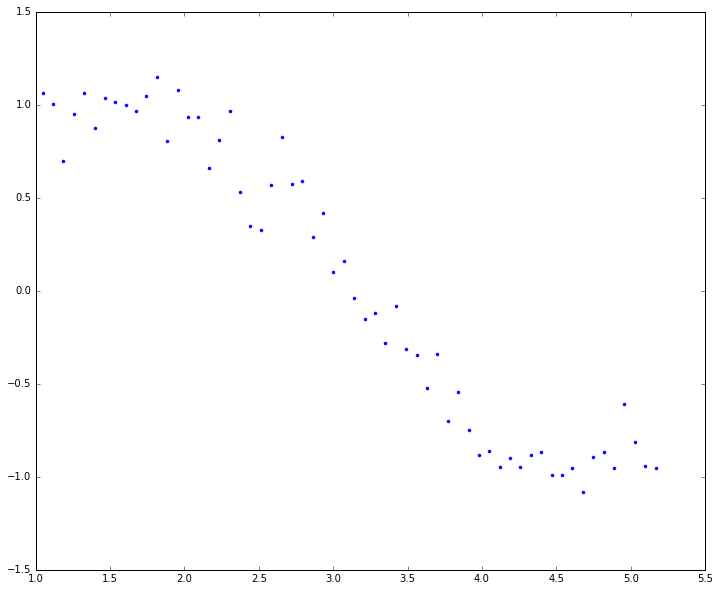

In [53]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [64]:
print totaldf.head()

               Country  LifeExpectancy  Smoking  AlcConsumption  Overweight  \
0          Afghanistan              60      nan            0.01          16   
1              Albania              78       30             5.3          53   
2              Algeria              76      nan            0.45          59   
3               Angola              52      nan             7.8          31   
4  Antigua and Barbuda              76      nan             7.8          62   

   LowExercise  Cholesterol  BloodSugar  ImprovedWater  ImprovedSanitation  \
0          nan           22         8.4             55                  32   
1          nan           45         8.3             95                  93   
2           34           39          10             84                  88   
3          nan           31         5.6             49                  52   
4          nan           43          12             98                 nan   

   MaternalDeaths  UVRadiation  HomicideRate  TrafficDea

In [55]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

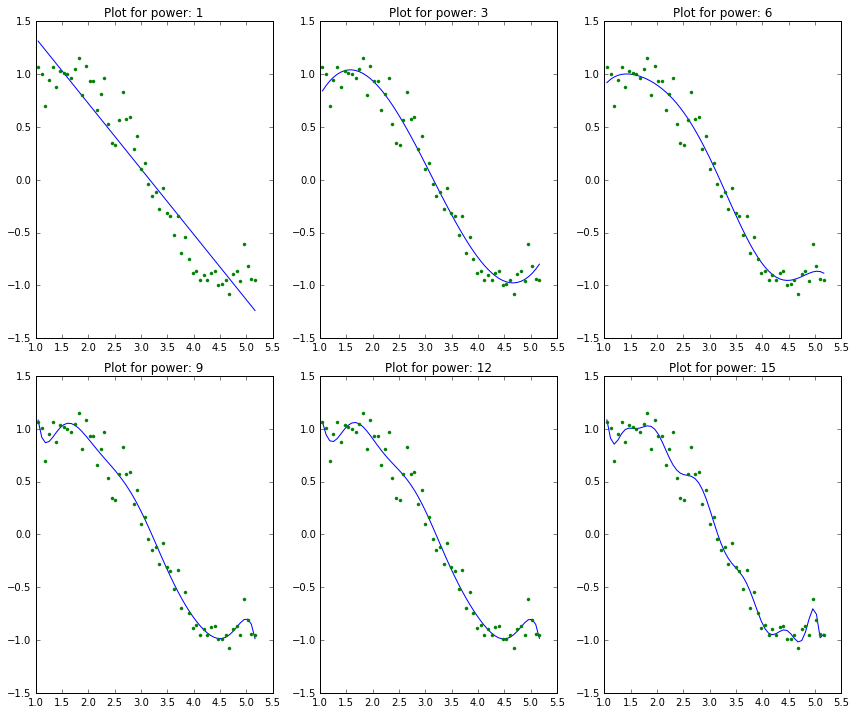

In [56]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

#Define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [57]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.3,2,-0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.3,1.9,-0.58,-0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.1,-1.1,3,-1.3,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.1,-0.27,1.7,-0.53,-0.036,0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1,3,-5.1,4.7,-1.9,0.33,-0.021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.99,-2.8,9.5,-9.7,5.2,-1.6,0.23,-0.014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.93,19,-56,69,-45,17,-3.5,0.4,-0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.92,43,-1.4e+02,1.8e+02,-1.3e+02,58,-15,2.4,-0.21,0.0077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.87,1.7e+02,-6.1e+02,9.6e+02,-8.5e+02,4.6e+02,-1.6e+02,37,-5.2,0.42,-0.015,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.87,1.4e+02,-4.9e+02,7.3e+02,-6e+02,2.9e+02,-87,15,-0.81,-0.14,0.026,-0.0013,NaN,NaN,NaN,NaN,NaN


In [58]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['LifeExpectancy'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['LifeExpectancy'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['LifeExpectancy'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

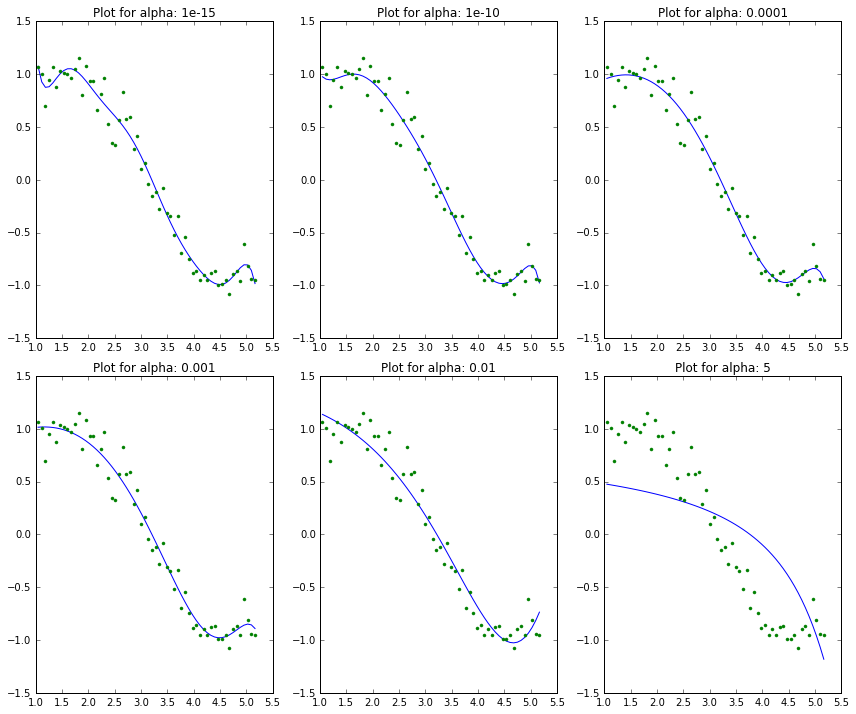

In [59]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [60]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.87,95,-3e+02,3.8e+02,-2.4e+02,67,0.41,-4.7,0.61,0.15,-0.029,-0.0046,0.0008,0.0002,-4.9e-05,3.3e-06,-4.4e-08
alpha_1e-10,0.92,11,-29,31,-15,2.9,0.17,-0.091,-0.011,0.002,0.00064,2.4e-05,-2e-05,-4.2e-06,2.2e-07,2.3e-07,-2.3e-08
alpha_1e-08,0.95,1.3,-1.5,1.7,-0.68,0.039,0.016,0.00016,-0.00036,-5.4e-05,-2.9e-07,1.1e-06,1.9e-07,2e-08,3.9e-09,8.2e-10,-4.6e-10
alpha_0.0001,0.96,0.56,0.55,-0.13,-0.026,-0.0028,-0.00011,4.1e-05,1.5e-05,3.7e-06,7.4e-07,1.3e-07,1.9e-08,1.9e-09,-1.3e-10,-1.5e-10,-6.2e-11
alpha_0.001,1,0.82,0.31,-0.087,-0.02,-0.0028,-0.00022,1.8e-05,1.2e-05,3.4e-06,7.3e-07,1.3e-07,1.9e-08,1.7e-09,-1.5e-10,-1.4e-10,-5.2e-11
alpha_0.01,1.4,1.3,-0.088,-0.052,-0.01,-0.0014,-0.00013,7.2e-07,4.1e-06,1.3e-06,3e-07,5.6e-08,9e-09,1.1e-09,4.3e-11,-3.1e-11,-1.5e-11
alpha_1,5.6,0.97,-0.14,-0.019,-0.003,-0.00047,-7e-05,-9.9e-06,-1.3e-06,-1.4e-07,-9.3e-09,1.3e-09,7.8e-10,2.4e-10,6.2e-11,1.4e-11,3.2e-12
alpha_5,14,0.55,-0.059,-0.0085,-0.0014,-0.00024,-4.1e-05,-6.9e-06,-1.1e-06,-1.9e-07,-3.1e-08,-5.1e-09,-8.2e-10,-1.3e-10,-2e-11,-3e-12,-4.2e-13
alpha_10,18,0.4,-0.037,-0.0055,-0.00095,-0.00017,-3e-05,-5.2e-06,-9.2e-07,-1.6e-07,-2.9e-08,-5.1e-09,-9.1e-10,-1.6e-10,-2.9e-11,-5.1e-12,-9.1e-13
alpha_20,23,0.28,-0.022,-0.0034,-0.0006,-0.00011,-2e-05,-3.6e-06,-6.6e-07,-1.2e-07,-2.2e-08,-4e-09,-7.5e-10,-1.4e-10,-2.5e-11,-4.7e-12,-8.7e-13


In [61]:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

In [62]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

/Users/jburchell/.virtualenvs/life-expectancy/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


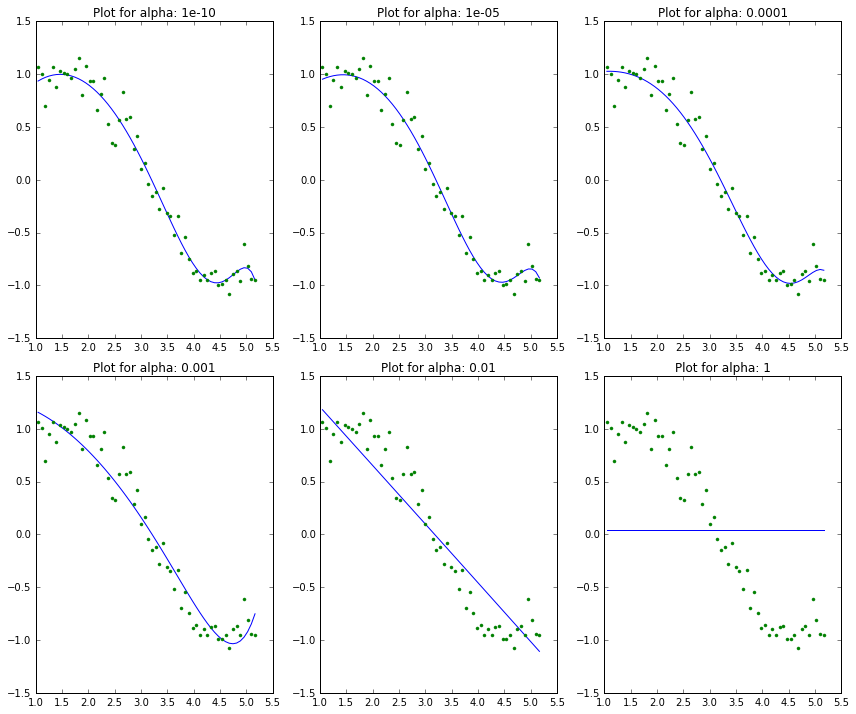

In [63]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [74]:
list(totaldf.columns.values)[2:]

['AlcConsumption',
 'Overweight',
 'Cholesterol',
 'BloodSugar',
 'ImprovedWater',
 'ImprovedSanitation',
 'MaternalDeaths',
 'UVRadiation',
 'HomicideRate',
 'TrafficDeaths',
 'Tubercululosis',
 'Suicide']

In [75]:
totaldf.to_csv("Total life expectancy.csv")